# 0 load packages and read in the data

In [2]:
import pandas as pd
print('Pandas', pd.__version__)

Pandas 1.1.3


In [3]:
import numpy as np
print('Numpy', np.__version__)

Numpy 1.19.2


In [4]:
import matplotlib.pyplot as plt

In [5]:
#df = pd.read_csv('input_data/Baltimore_Employee_Salaries.csv') # waaay faster to download first
df = pd.read_csv('https://opendata.arcgis.com/datasets/afdaf8cca48a4bcea9282a781e9190a6_0.csv') # works but is slow
df

,ID,FirstName,MI,LastName,JobTitle,AgencyID,AgencyName,HireDate,AnnualSalary,GrossPay,FiscalYear,ObjectId
0,201,Desiree,C,Alston,SCHOOL HEALTH AIDE (10 MONTHS),A65105,HLTH-Health Department,2009/10/29 04:00:00+00,23395.0,20482.58,FY2011,1
1,101,Maude,E,Akins,DATA ENTRY OPERATOR II,A49300,TRANS-Highways,2002/11/25 05:00:00+00,31609.0,28525.11,FY2011,2
2,301,Shavonna,A,Anderson,EMERGENCY DISPATCHER,A99372,Police Department,2001/11/29 05:00:00+00,44331.0,44093.40,FY2011,3
3,51,Margaret,E,Adams,PROGRAM ASSISTANT I,A65200,HLTH-Health Department,2008/05/05 04:00:00+00,33841.0,30336.61,FY2011,4
4,1,Patricia,G,Aaron,Facilities/Office Services II,A03031,OED-Employment Dev,1979/10/24 04:00:00+00,50845.0,45505.94,FY2011,5
...,...,...,...,...,...,...,...,...,...,...,...,...
154643,154582,Shane,NaN,Young,WW Opns Tech II Sanitary,A50207,DPW-Water & Waste Water (207),2006/06/24 04:00:00+00,46107.0,65518.32,FY2020,154644
154644,154583,Thomas,G,Young,Police Officer EID,A99322,Police Department (322),2010/10/13 04:00:00+00,79923.0,108657.52,FY2020,154645
154645,154584,Valerie,K,Young,Operations Officer II,A14003,FIN-Collections (003),2011/06/16 04:00:00+00,72730.0,69826.93,FY2020,154646
154646,154585,Veronica,W,Young,Office Assistant III,A75014,Enoch Pratt Free Library (014),1973/08/27 04:00:00+00,43759.0,44235.77,FY2020,154647


# 1 sanity checks 

In [6]:
df.shape

(154648, 12)

In [7]:
df.dtypes

ID                int64
FirstName        object
MI               object
LastName         object
JobTitle         object
AgencyID         object
AgencyName       object
HireDate         object
AnnualSalary    float64
GrossPay        float64
FiscalYear       object
ObjectId          int64
dtype: object

In [8]:
# directly from https://towardsdatascience.com/exploratory-data-analysis-in-python-c9a77dfa39ce
# Rows containing duplicate data
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape) # AMAZING: no duplicates

number of duplicate rows:  (0, 12)


In [9]:
df.isnull().sum()

ID                  0
FirstName           0
MI              30910
LastName          410
JobTitle            0
AgencyID            0
AgencyName          0
HireDate            0
AnnualSalary        0
GrossPay         8479
FiscalYear          0
ObjectId            0
dtype: int64

# 2 descriptive statistics

In [10]:
df.describe()

,ID,AnnualSalary,GrossPay,ObjectId
count,154648.000000,154648.000000,146169.000000,154648.000000
mean,77324.500000,48678.951298,51740.542706,77324.500000
std,44643.176552,25924.841964,33734.963014,44643.176552
min,1.000000,0.000000,-1349.000000,1.000000
25%,38662.750000,31137.000000,30338.490000,38662.750000
50%,77324.500000,45475.000000,49010.420000,77324.500000
75%,115986.250000,66086.000000,71819.670000,115986.250000
max,154648.000000,275000.000000,373111.190000,154648.000000


In [11]:
df.describe(include = 'all')

,ID,FirstName,MI,LastName,JobTitle,AgencyID,AgencyName,HireDate,AnnualSalary,GrossPay,FiscalYear,ObjectId
count,154648.000000,154648,123738,154238,154648,154648,154648,154648,154648.000000,146169.000000,154648,154648.000000
unique,NaN,10930,61,12422,2437,1506,1348,6762,NaN,NaN,10,NaN
top,NaN,Michael,A,Johnson,POLICE OFFICER,C90786,Police Department,2013/06/10 04:00:00+00,NaN,NaN,FY2013,NaN
freq,NaN,2805,16011,2417,11443,2590,6686,2550,NaN,NaN,19137,NaN
mean,77324.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,48678.951298,51740.542706,NaN,77324.500000
std,44643.176552,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25924.841964,33734.963014,NaN,44643.176552
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,-1349.000000,NaN,1.000000
25%,38662.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31137.000000,30338.490000,NaN,38662.750000
50%,77324.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45475.000000,49010.420000,NaN,77324.500000
75%,115986.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,66086.000000,71819.670000,NaN,115986.250000


In [12]:
df

,ID,FirstName,MI,LastName,JobTitle,AgencyID,AgencyName,HireDate,AnnualSalary,GrossPay,FiscalYear,ObjectId
0,201,Desiree,C,Alston,SCHOOL HEALTH AIDE (10 MONTHS),A65105,HLTH-Health Department,2009/10/29 04:00:00+00,23395.0,20482.58,FY2011,1
1,101,Maude,E,Akins,DATA ENTRY OPERATOR II,A49300,TRANS-Highways,2002/11/25 05:00:00+00,31609.0,28525.11,FY2011,2
2,301,Shavonna,A,Anderson,EMERGENCY DISPATCHER,A99372,Police Department,2001/11/29 05:00:00+00,44331.0,44093.40,FY2011,3
3,51,Margaret,E,Adams,PROGRAM ASSISTANT I,A65200,HLTH-Health Department,2008/05/05 04:00:00+00,33841.0,30336.61,FY2011,4
4,1,Patricia,G,Aaron,Facilities/Office Services II,A03031,OED-Employment Dev,1979/10/24 04:00:00+00,50845.0,45505.94,FY2011,5
...,...,...,...,...,...,...,...,...,...,...,...,...
154643,154582,Shane,NaN,Young,WW Opns Tech II Sanitary,A50207,DPW-Water & Waste Water (207),2006/06/24 04:00:00+00,46107.0,65518.32,FY2020,154644
154644,154583,Thomas,G,Young,Police Officer EID,A99322,Police Department (322),2010/10/13 04:00:00+00,79923.0,108657.52,FY2020,154645
154645,154584,Valerie,K,Young,Operations Officer II,A14003,FIN-Collections (003),2011/06/16 04:00:00+00,72730.0,69826.93,FY2020,154646
154646,154585,Veronica,W,Young,Office Assistant III,A75014,Enoch Pratt Free Library (014),1973/08/27 04:00:00+00,43759.0,44235.77,FY2020,154647


In [13]:
df['HireDate_clean'] = pd.to_datetime(df['HireDate']) # todo make new column, or split to day, month, year.

# https://stackoverflow.com/questions/57767968/split-date-in-formatyyyy-mm-dd-into-3-new-columns-in-dataframe-as-year-month
df['HireYear'] = df['HireDate_clean'].dt.year
df['HireMonth'] = df['HireDate_clean'].dt.month
df['HireDay'] = df['HireDate_clean'].dt.day
df['FiscalYear'] = df['FiscalYear'].str.lstrip(to_strip = 'FY').astype('int')

In [14]:
df.value_counts(['AgencyName']) #, sort=True, ascending=True)

AgencyName              
Police Department           6686
Youth Summer                5712
Police Department           3428
Fire Department             3306
DPW-Water & Waste Water     2990
                            ... 
Youth Summer  (569)            1
Youth Summer  (572)            1
Youth Summer  (574)            1
Youth Summer (618)             1
BPD 1                          1
Length: 1348, dtype: int64

In [15]:
df['AgencyName_simplified'] = df['AgencyName'].replace(to_replace = '\W\\(\d\d\d.', value = '', regex = True)
df['AgencyName_simplified'] = df['AgencyName_simplified'].str.strip()

In [16]:
df['AgencyName_simplified'].nunique()

117

In [17]:
#print(df_new.sort_values(by = 'A', ascending = False))
#names = df.sort_values(by = 'AgencyName_simplified')[['AgencyName_simplified', 'AgencyName']].drop_duplicates()
names = df.sort_values(by = 'AgencyName_simplified')[['AgencyName_simplified']].drop_duplicates()
names

,AgencyName_simplified
138844,BPD 1
138845,BPD 10
138846,BPD 11
138847,BPD 12
138848,BPD 13
...,...
23218,War Memorial Commission
505,Youth Cust
36463,Youth Cust (A90)
63116,Youth Summer


In [18]:
pd.set_option('display.max_rows', None)
names.head(117)

,AgencyName_simplified
138844,BPD 1
138845,BPD 10
138846,BPD 11
138847,BPD 12
138848,BPD 13
138849,BPD 14
138850,BPD 15
138851,BPD 16
139100,BPD 2
139101,BPD 3


In [19]:
# https://snippets.cacher.io/snippet/a93fb906f7ae554d7b62
def case_when_agency_names(row):
    if(row['AgencyName_simplified'] == 'BPD 1' or row['AgencyName_simplified'] == 'BPD 2' or row['AgencyName_simplified'] == 'BPD 3' or row['AgencyName_simplified'] == 'BPD 4' or row['AgencyName_simplified'] == 'BPD 5' or row['AgencyName_simplified'] == 'BPD 6' or row['AgencyName_simplified'] == 'BPD 7' or row['AgencyName_simplified'] == 'BPD 8' or row['AgencyName_simplified'] == 'BPD 9' or row['AgencyName_simplified'] == 'BPD 10' or row['AgencyName_simplified'] == 'BPD 11' or row['AgencyName_simplified'] == 'BPD 12' or row['AgencyName_simplified'] == 'BPD 13' or row['AgencyName_simplified'] == 'BPD 14' or row['AgencyName_simplified'] == 'BPD 15' or row['AgencyName_simplified'] == 'BPD 16' or row['AgencyName_simplified'] == 'Police' or row['AgencyName_simplified'] == 'Police Department' or row['AgencyName_simplified'] == 'Police Department (MIL)'):
        return 'Police Department'
    elif(row['AgencyName_simplified'] == 'COMP-Audits' or row['AgencyName_simplified'] == 'COMP-Communication Ser' or row['AgencyName_simplified'] == 'COMP-Communication Services' or row['AgencyName_simplified'] == "COMP-Comptroller's O" or row['AgencyName_simplified'] == "COMP-Comptroller's Office" or row['AgencyName_simplified'] == 'COMP-Real Estate'):
        return 'Comptrollers Office'
    elif(row['AgencyName_simplified'] == 'Civil Rights & Wage Enfor' or row['AgencyName_simplified'] == 'Civil Rights & Wage Enforce' or row['AgencyName_simplified'] == 'Civil Rights & Wage Enforce (0'):
        return 'Civil Rights'
    elif(row['AgencyName_simplified'] == 'DPW-Administration' or row['AgencyName_simplified'] == 'DPW-Solid Waste' or row['AgencyName_simplified'] == 'DPW-Solid Waste (wkly)' or row['AgencyName_simplified'] == 'DPW-Water & Waste Water'):
        return 'Department of Public Works'
    elif(row['AgencyName_simplified'] == 'FIN-Acct & Payroll' or row['AgencyName_simplified'] == 'FIN-Admin & Budgets' or row['AgencyName_simplified'] == 'FIN-Collections' or row['AgencyName_simplified'] == 'FIN-Purchasing' or row['AgencyName_simplified'] == 'FIN-RSP Admin' or row['AgencyName_simplified'] == 'FIN-Risk Management Oper' or row['AgencyName_simplified'] == 'FIN-Treasury Mgt'):
        return 'Finance'
    elif(row['AgencyName_simplified'] == 'Fire Academy Recruits' or row['AgencyName_simplified'] == 'Fire Department (MIL)'):
        return 'Fire Department'
    elif(row['AgencyName_simplified'] == 'HLTH-Emergency Medical Team' or row['AgencyName_simplified'] == 'HLTH-Health Department' or row['AgencyName_simplified'] == 'HLTH-Health Department (MIL)' or row['AgencyName_simplified'] == 'HLTH-Health Dept Locatio ' or row['AgencyName_simplified'] == 'HLTH-Health Dept Location 198' or row['AgencyName_simplified'] == 'HLTH-Health Dept. Locatio' or row['AgencyName_simplified'] == 'HLTH-Health Dept. Location 111' or row['AgencyName_simplified'] == 'HLTH-Health Dept. Location 113' or row['AgencyName_simplified'] == 'HLTH-Health Dept. Location 114' or row['AgencyName_simplified'] == 'HLTH-Health Dept. Location 116' or row['AgencyName_simplified'] == 'HLTH-Health Dept. Location 117' or row['AgencyName_simplified'] == 'HLTH-Health Dept. Location 195' or row['AgencyName_simplified'] == 'HLTH-Health Dept. Location 196' or row['AgencyName_simplified'] == 'HLTH-Health Dept. Location 199' or row['AgencyName_simplified'] == 'HLTH-Health' or row['AgencyName_simplified'] == 'HLTH-Health Dept. Locatio' or row['AgencyName_simplified'] == 'HLTH-Heatlh Dept. Location 115' or row['AgencyName_simplified'] == 'HLTH-Heatlh Dept.' or row['AgencyName_simplified'] == 'HLTH-Heatlh Dept. Locatio' or row['AgencyName_simplified'] == 'HLTH-Heatlh'):
        return 'Health Department'
    elif(row['AgencyName_simplified'] == 'HR-Human Resources' or row['AgencyName_simplified'] == 'HR-Test Monitor'):
        return 'Human Resources'
    elif(row['AgencyName_simplified'] == 'Housing & Community Dev' or row['AgencyName_simplified'] == 'Housing & Community Dev (MIL)'):
        return 'Housing & Community Development'
    elif(row['AgencyName_simplified'] == "M-R Cable & Comm" or row['AgencyName_simplified'] == "M-R Convention Center" or row['AgencyName_simplified'] == "M-R Environmental Cntrl" or row['AgencyName_simplified'] == "M-R Human Services" or row['AgencyName_simplified'] == "M-R Info Techology" or row['AgencyName_simplified'] == "M-R Info Technology"  or row['AgencyName_simplified'] == "M-R Labor Commissioner"):
        return 'M-R'
    elif(row['AgencyName_simplified'] == "Mayor's Office"):
        return 'Mayors Office'
    elif(row['AgencyName_simplified'] == "Municipal & Zoning Appeal" or row['AgencyName_simplified'] == "Municipal & Zoning Appeals 001"):
        return 'Municipal & Zoning Appeal'
    elif(row['AgencyName_simplified'] == "OED-Employment Dev" or row['AgencyName_simplified'] == "OED-Participants-Youth Summer"):
        return 'OED'
    elif(row['AgencyName_simplified'] == "R&P-Administration" or row['AgencyName_simplified'] == "R&P-Parks" or row['AgencyName_simplified'] == "R&P-Parks (wkly)" or row['AgencyName_simplified'] == "R&P-Recreation" or row['AgencyName_simplified'] == "R&P-Recreation (part-ti" or row['AgencyName_simplified'] == "R&P-Recreation (part-time) ("):
        return 'Recreation & Parks'
    elif(row['AgencyName_simplified'] == "TRANS-Cross Guard-S" or row['AgencyName_simplified'] == "TRANS-Cross Guard-Summer" or row['AgencyName_simplified'] == "TRANS-Crossing Guards" or row['AgencyName_simplified'] == "TRANS-Highways" or row['AgencyName_simplified'] == "TRANS-Highways (wkly)" or row['AgencyName_simplified'] == "TRANS-Towing" or row['AgencyName_simplified'] == "TRANS-Traffic"):
        return 'Recreation & Parks'
    elif(row['AgencyName_simplified'] == "Youth Cust" or row['AgencyName_simplified'] == "Youth Cust (A90)" or row['AgencyName_simplified'] == "Youth Summer" or row['AgencyName_simplified'] == "Youth Temp Adult"):
        return 'Youth' 
    else:
        return row['AgencyName_simplified']
        #return 'XXX'
 
# apply case_when function
df['AgencyName_simplified_2'] = df.apply(case_when_agency_names, axis=1)

In [20]:
agency_freqs = df['AgencyName_simplified_2'].value_counts()
agency_freqs

Police Department                  31723
Recreation & Parks                 23715
Department of Public Works         23548
Fire Department                    16758
Youth                              11844
Health Department                   9304
Enoch Pratt Free Library            4721
M-R                                 4705
Housing & Community Development     4263
States Attorneys Office             3834
General Services                    3781
Finance                             2807
Sheriff's Office                    1956
OED                                 1804
Dem 01                              1448
Circuit Court                       1407
Mayors Office                       1100
Law Department                      1056
City Council                         909
Comptrollers Office                  901
Human Resources                      676
Planning Department                  518
ERS/EOS Admin                        312
FPR Admin                            256
Liquor License B

In [21]:
"""
https://stackoverflow.com/questions/63067496/how-do-i-assign-other-to-low-frequency-categories-pandas
city_freq = (df['city'].value_counts())/df.shape[0]
botton_decile = city_freq.quantile(q=0.1)
less_freq_cities = city_freq[city_freq<=botton_decile]
df.loc[df["city"].isin(less_freq_cities.index.tolist())] = "other"
"""
agency_percs = (df['AgencyName_simplified_2'].value_counts())/df.shape[0]
bottom_decile = agency_percs.quantile(q = 0.005)
less_freq_agencies = agency_percs[agency_percs<=bottom_decile]
df.loc[df['AgencyName_simplified_2'].isin(less_freq_agencies.index.tolist())] = "other"

In [22]:
agency_freqs = df['AgencyName_simplified_2'].value_counts()
agency_freqs

Police Department                  31723
Recreation & Parks                 23715
Department of Public Works         23548
Fire Department                    16758
Youth                              11844
Health Department                   9304
Enoch Pratt Free Library            4721
M-R                                 4705
Housing & Community Development     4263
States Attorneys Office             3834
General Services                    3781
Finance                             2807
Sheriff's Office                    1956
OED                                 1804
Dem 01                              1448
Circuit Court                       1407
Mayors Office                       1100
Law Department                      1056
City Council                         909
Comptrollers Office                  901
Human Resources                      676
Planning Department                  518
ERS/EOS Admin                        312
FPR Admin                            256
Liquor License B

In [24]:
gp_by_year = df[['AgencyName_simplified_2', 'FiscalYear', 'GrossPay']].copy().groupby(['AgencyName_simplified_2', 'FiscalYear']).sum().reset_index()
gp_by_year

,AgencyName_simplified_2,FiscalYear,GrossPay
0,Circuit Court,2011,6.99223e+06
1,Circuit Court,2012,7.41823e+06
2,Circuit Court,2013,6.90544e+06
3,Circuit Court,2014,6.93043e+06
4,Circuit Court,2015,7.60012e+06
5,Circuit Court,2016,7.04509e+06
6,Circuit Court,2017,6.99385e+06
7,Circuit Court,2018,7.71776e+06
8,Circuit Court,2019,7.23118e+06
9,Circuit Court,2020,8.21304e+06


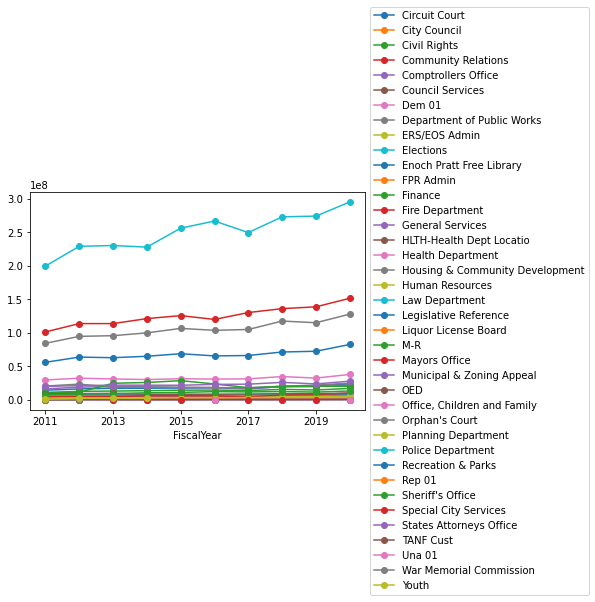

In [25]:
#https://stackoverflow.com/questions/39152875/plot-multiple-lines-in-a-line-graph-using-matplotlib
gp_by_year.pivot('FiscalYear', 'AgencyName_simplified_2', 'GrossPay').plot(kind = 'line', marker = 'o')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

In [26]:
#agency_freqs.dataframe #.plot.bar(x = '')

AttributeError: 'Series' object has no attribute 'dataframe'

In [27]:
#df18 = 
df[df.FiscalYear.eq(2018)].value_counts(['AgencyName_simplified_2']).rename_axis('Agency').to_frame('Employees in 2018')

,Employees in 2018
Agency,
Police Department,3005
Department of Public Works,2319
Recreation & Parks,2237
Fire Department,1690
Health Department,923
Enoch Pratt Free Library,488
M-R,430
States Attorneys Office,400
Housing & Community Development,388
